<a href="https://colab.research.google.com/github/ninivehelen/Modelos_Machine_Learning/blob/master/Machine_learning_Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando dados de insufienciência Cardíaca**

# **Prevendo quando tem insuficiência Cardíaca**
**Utilizando a técnica Naive Bayes. (Machine Learning)**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importando Bibliotecas**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
dados_heart = pd.read_csv("/content/drive/MyDrive/heart.csv")

**Lendo os dados**

In [6]:
dados_heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**Gráfico sobre insuficiência cardiáca**

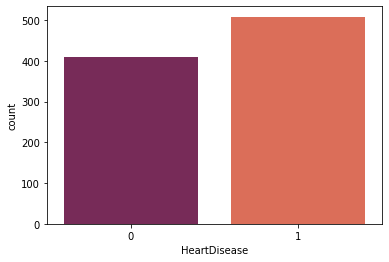

In [8]:
sns.countplot(x = dados_heart['HeartDisease'], palette= "rocket");

**Descrião dos dados**

In [9]:
dados_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Gráfico de histograma da idade**

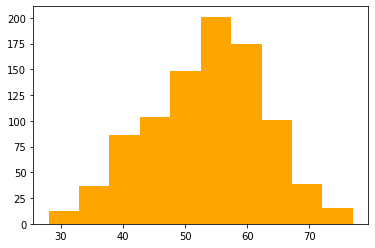

In [10]:
plt.hist(x = dados_heart['Age'], color='orange');

In [11]:
dados_heart_m = dados_heart.loc[dados_heart["Sex"] == "M"]
dados_heart_f = dados_heart.loc[dados_heart["Sex"] == "F"]


In [12]:
dados_m = dados_heart_m.filter(items = ['Sex' ,'HeartDisease']).groupby('HeartDisease').count().sort_values(by='HeartDisease',ascending=False)                                                                                                  

In [13]:
dados_f = dados_heart_f.filter(items = ['Sex' ,'HeartDisease']).groupby('HeartDisease').count().sort_values(by='HeartDisease',ascending=False)                                                                                                 


In [14]:
dados = pd.merge(dados_m, dados_f, how = 'inner', on = 'HeartDisease')

In [15]:
dados = dados.rename(columns={'Sex_x': 'M', 'Sex_y': 'F'})

**Dados do sexo maculino sobre insuficência Cardiáca**

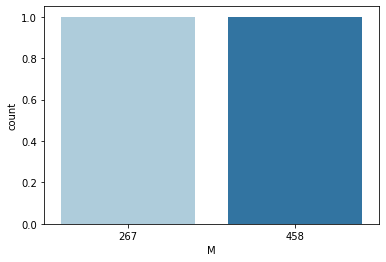

In [16]:
sns.countplot(x = dados['M'],palette="Paired");

**Dados do sexo feminino sobre insuficência Cardiáca**

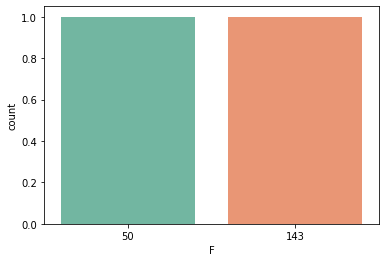

In [17]:
sns.countplot(x = dados['F'],palette="Set2");

**Media da idade**

In [18]:
dados_heart["Age"].mean()

53.510893246187365

**Aplicando Machine Learning/ Prevendo insuficiencia Cardíaca**

**Verificando se tem dados faltantes**

In [20]:
dados_heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Dados previsores**

In [21]:
x = dados_heart[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']]

**Dados Classe**

In [81]:
y = dados_heart.iloc[:, 11].values

In [82]:
from sklearn.model_selection import train_test_split

In [154]:
x_treinamento_heart,x_teste_heart,y_treinamento_heart,y_teste_heart = train_test_split(x, y, test_size=0.20)

**Visualizando quantidade dos dados**

In [155]:
x_treinamento_heart.shape, x_teste_heart.shape

((734, 6), (184, 6))

In [156]:
y_treinamento_heart.shape, y_teste_heart.shape

((734,), (184,))

**Treinando os dados**

In [157]:
from sklearn.naive_bayes import GaussianNB

In [158]:
heart_naive = GaussianNB()
heart_naive.fit(x_treinamento_heart, y_treinamento_heart)

GaussianNB(priors=None, var_smoothing=1e-09)

In [159]:
previsoes = heart_naive.predict(x_teste_heart)

In [160]:
previsoes

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0])

In [161]:
y_teste_heart

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0])

**Verificando a porcentagem de acertos**

In [162]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [166]:
accuracy_score(y_teste_heart,previsoes) * 100

78.80434782608695

**Accurary com 78% de acerto**

**Matriz de Confusão**

In [164]:
confusion_matrix(y_teste_heart, previsoes)

array([[59, 19],
       [20, 86]])

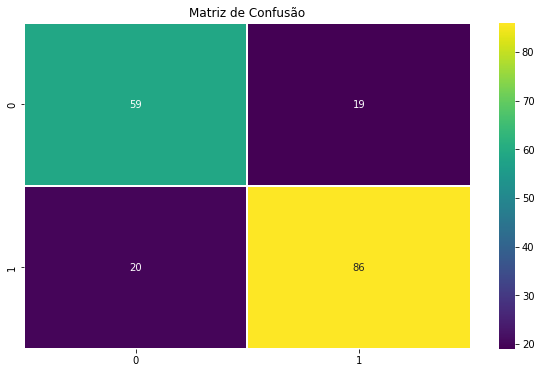

In [165]:
matriz= confusion_matrix(y_teste_heart, previsoes)
plt.figure(figsize=(10,6))
sns.heatmap(matriz, linewidths=1, cmap='viridis', annot=True)
plt.title("Matriz de Confusão");

**Porcentagem de acerto para quando tem insuficiencia cardiaca = 0 quando tem  = 1**

In [167]:
print(classification_report(y_teste_heart, previsoes))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75        78
           1       0.82      0.81      0.82       106

    accuracy                           0.79       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.79      0.79      0.79       184

